<a href="https://colab.research.google.com/github/kiseonjeong/keras-ml/blob/fc-ae/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Connected Auto Encoder

In [87]:
from tensorflow.keras import layers, models

In [88]:
# 완전 연결 계층 AE 모델링
class AE(models.Model):
    def __init__(self, x_nodes=784, z_dim=36):
        x_shape = (x_nodes,)
        x = layers.Input(shape=x_shape)
        z = layers.Dense(z_dim, activation='relu')(x)
        y = layers.Dense(x_nodes, activation='sigmoid')(z)

        super().__init__(x, y)

        self.x = x
        self.z = z
        self.z_dim = z_dim

        self.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy'])
        
    def Encoder(self):
        return models.Model(self.x, self.z)

    def Decoder(self):
        z_shape = (self.z_dim,)
        z = layers.Input(shape=z_shape)
        y_layer = self.layers[-1]
        y = y_layer(z)
        return models.Model(z, y)

In [89]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [90]:
# 데이터 준비
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [91]:
%run 'drive/MyDrive/Colab Notebooks/Keras/skeras.ipynb'

In [92]:
# 완전 연결 계층 AE 동작 확인
def show_ae(autoencoder):
    encoder = autoencoder.Encoder()
    decoder = autoencoder.Decoder()

    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.stem(encoded_imgs[i].reshape(-1))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2701 - accuracy: 0.0115 - val_loss: 0.1826 - val_accuracy: 0.0132
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1636 - accuracy: 0.0114 - val_loss: 0.1464 - val_accuracy: 0.0115
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1376 - accuracy: 0.0106 - val_loss: 0.1273 - val_accuracy: 0.0094
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1223 - accuracy: 0.0110 - val_loss: 0.1152 - val_accuracy: 0.0099
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1125 - accuracy: 0.0114 - val_loss: 0.1074 - val_accuracy: 0.0110
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.0121 - val_loss: 0.1018 - val_accuracy: 0.0125
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1010 - accuracy: 0.0126 - val_loss: 0.0977 - val_accuracy: 0.0132
Epoch 

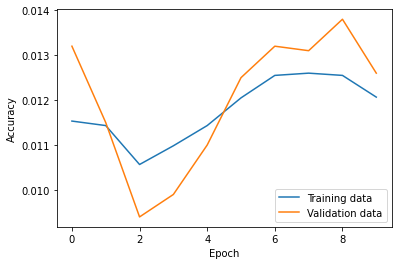

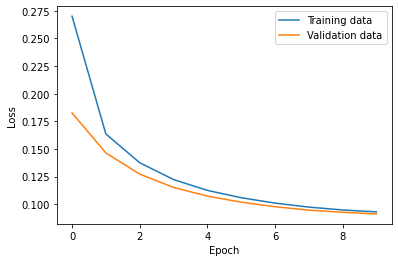

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

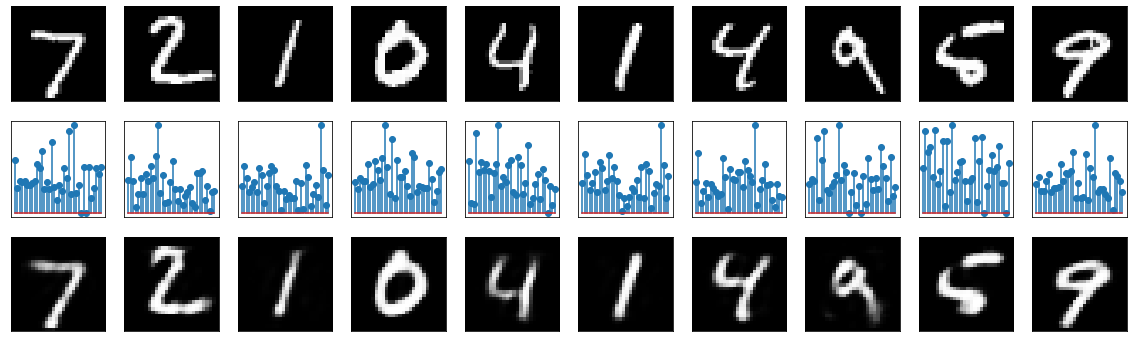

In [93]:
x_nodes = 784
z_dim = 36

autoencoder = AE(x_nodes, z_dim)

history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()

show_ae(autoencoder)
plt.show()